### These are the series of libraries we are gonna use to clean and preprocesses the dataset

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [119]:
filepath="train.csv"
df=pd.read_csv(filepath)
df.shape

(592380, 28)

In [120]:
target=df['y']

In [121]:
target

0         1
1         0
2         0
3         1
4         1
         ..
592375    1
592376    0
592377    0
592378    0
592379    0
Name: y, Length: 592380, dtype: int64

In [122]:
X=df.iloc[:,1:27]

In [123]:
X

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,...,8,1,6,14,6,6,1,1,10,2
1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,...,7,6,11,1,6,1,4,4,1,13
2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,...,3,1,4,21,12,1,16,10,4,9
3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,...,10,13,12,2,4,2,7,1,2,11
4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,...,14,12,2,2,4,1,3,1,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,4110.2,4110.3,1.0,1.0,2.0,1,4110.2,4110.0,4109.4,4109.2,...,2,2,1,3,2,2,3,10,7,7
592376,4109.4,4110.5,6.0,5.0,11.0,1,4109.2,4109.0,4108.6,4108.2,...,3,2,2,6,5,3,9,7,7,5
592377,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,4108.2,...,3,2,2,6,5,3,9,7,7,5
592378,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,4108.2,...,3,2,2,6,5,3,9,7,7,5


### Now To check distribution for all these columns, so that i get an idea about all distribution, I will check the skewness of each features
### decide what to do before missing value imputation

In [125]:
for col in X.columns:
   print( col,"     ",X[col].skew())

last_price       -0.1318266914887565
mid       -0.13181556203389655
opened_position_qty        4.873756868872239
closed_position_qty       7.4417398279776705
transacted_qty       7.9982016395766165
d_open_interest       -2.4496321474251213
bid1       -0.1319289874260657
bid2       -0.13201834984143343
bid3       -0.13209586725928818
bid4       -0.13218342938721048
bid5       -0.13227343028382207
ask1       -0.13170045582182213
ask2       -0.13161059172624295
ask3       -0.1315290539612179
ask4       -0.13144983622975548
ask5       -0.1313743815795252
bid1vol       3.97357604576601
bid2vol       3.9128074911626243
bid3vol       3.799053642764981
bid4vol       3.633175710430665
bid5vol       3.832013322629531
ask1vol       4.728143963787534
ask2vol       4.569577280449915
ask3vol       4.661318897472004
ask4vol       4.806260457816488
ask5vol       4.684146042504978


In [126]:
X.describe()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
count,592380.000000,592380.000000,419920.000000,419920.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,...,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000
mean,3965.639532,3965.639078,1.400583,1.964277,2.390106,-0.080745,3965.446863,3965.209031,3964.985168,3964.763521,...,3.831917,4.906759,5.314979,5.601242,5.930859,3.887878,4.913441,5.309274,5.611319,5.927790
std,81.801597,81.801148,2.262542,2.612520,3.781083,2.349781,81.795678,81.789472,81.783336,81.776174,...,4.269410,5.098520,5.411883,5.731617,6.256011,4.505598,5.432179,5.920962,6.505823,6.975328
min,3812.000000,3812.100000,0.000000,0.000000,0.000000,-171.000000,3811.800000,3811.600000,3811.400000,3811.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3896.400000,3896.400000,0.000000,1.000000,0.000000,-1.000000,3896.200000,3896.000000,3895.800000,3895.600000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,3983.800000,3983.700000,1.000000,1.000000,1.000000,0.000000,3983.600000,3983.200000,3983.000000,3982.800000,...,2.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,4039.600000,4039.500000,2.000000,2.000000,3.000000,1.000000,4039.400000,4039.000000,4038.800000,4038.600000,...,5.000000,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,7.000000,7.000000
max,4115.800000,4116.000000,80.000000,212.000000,311.000000,50.000000,4115.800000,4115.600000,4115.000000,4114.800000,...,110.000000,139.000000,136.000000,119.000000,120.000000,130.000000,132.000000,133.000000,134.000000,135.000000


### As we can see from the 75% quartile and max value my dataset is filled with a ton of outliers , which was detected even through the boxplots in the earlier Assignments

<Axes: xlabel='d_open_interest', ylabel='Density'>

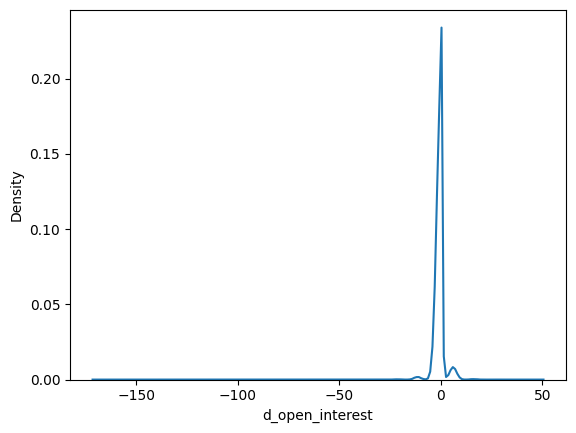

In [127]:
sns.kdeplot(X['d_open_interest'])

### So I will you IQR to remove the outliers from the dataset 

In [129]:
p25=[]
p75=[]

for col in X.columns:
    p25.append(X[col].quantile(0.25))
    p75.append(X[col].quantile(0.75))
p25=np.array(p25)
p75=np.array(p75)
iqr=p75-p25
iqr

array([143.2, 143.1,   2. ,   1. ,   3. ,   2. , 143.2, 143. , 143. ,
       143. , 143.2, 143.2, 143.2, 143.2, 143.2, 143.2,   4. ,   4. ,
         5. ,   5. ,   5. ,   4. ,   4. ,   4. ,   5. ,   5. ])

In [130]:
upper_limit=p75+ 1.5*iqr
lower_limit=p25- 1.5*iqr
upper_limit
lower_limit

array([ 3.68160e+03,  3.68175e+03, -3.00000e+00, -5.00000e-01,
       -4.50000e+00, -4.00000e+00,  3.68140e+03,  3.68150e+03,
        3.68130e+03,  3.68110e+03,  3.68040e+03,  3.68180e+03,
        3.68200e+03,  3.68220e+03,  3.68240e+03,  3.68260e+03,
       -5.00000e+00, -4.00000e+00, -5.50000e+00, -5.50000e+00,
       -5.50000e+00, -5.00000e+00, -4.00000e+00, -4.00000e+00,
       -5.50000e+00, -5.50000e+00])

In [131]:
i=0
for col in X.columns:
    p=X[X[col]>upper_limit[i]]
    i=i+1
p.describe()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
count,44205.000000,44205.000000,33062.000000,33062.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,...,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000,44205.000000
mean,3950.589580,3950.578878,1.749077,2.167443,2.929261,0.025631,3950.392630,3950.152915,3949.929384,3949.710386,...,4.111820,5.007488,5.367198,5.682864,5.807646,4.679154,6.034227,6.336206,8.477638,24.320258
std,77.372153,77.369969,2.705415,3.040629,4.479000,2.719955,77.367469,77.361973,77.357587,77.352290,...,4.614474,5.127433,5.389561,5.586085,6.153548,5.731506,7.282178,5.703736,7.110780,12.494635
min,3812.000000,3812.200000,0.000000,0.000000,0.000000,-66.000000,3812.000000,3811.800000,3811.600000,3811.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,3896.800000,3896.800000,0.000000,1.000000,0.000000,-1.000000,3896.600000,3896.400000,3896.200000,3896.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,4.000000,17.000000
50%,3916.000000,3916.100000,1.000000,1.000000,2.000000,0.000000,3915.800000,3915.600000,3915.400000,3915.200000,...,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,7.000000,20.000000
75%,4010.000000,4010.000000,2.000000,3.000000,4.000000,1.000000,4009.800000,4009.600000,4009.400000,4009.200000,...,5.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,8.000000,11.000000,27.000000
max,4114.000000,4114.100000,80.000000,83.000000,111.000000,50.000000,4114.000000,4113.800000,4113.600000,4113.400000,...,93.000000,87.000000,103.000000,107.000000,108.000000,100.000000,115.000000,73.000000,69.000000,135.000000


In [132]:
p.shape

(44205, 26)

In [133]:
i=0
for col in X.columns:
    p=p[p[col]<lower_limit[i]]
    i=i+1
p.describe()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
p.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [last_price, mid, opened_position_qty , closed_position_qty, transacted_qty, d_open_interest, bid1, bid2, bid3, bid4, bid5, ask1, ask2, ask3, ask4, ask5, bid1vol, bid2vol, bid3vol, bid4vol, bid5vol, ask1vol, ask2vol, ask3vol, ask4vol, ask5vol]
Index: []

[0 rows x 26 columns]>

### OOPS!!! not a good idea to trim the dataset as we ended up with 100% data lose , so I'll try to rather Cap the data to the max value in the box plot

In [135]:
i=0


for col in X.columns:
    X[col]=np.where(X[col]>upper_limit[i],upper_limit[i],(np.where(X[col] < lower_limit[i],lower_limit[i],X[col])))
    i=i+1
X.describe()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
count,592380.000000,592380.000000,419920.000000,419920.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,...,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000,592380.000000
mean,3965.639532,3965.639078,1.216344,1.531273,2.049168,-0.041912,3965.446863,3965.209031,3964.985168,3964.763521,...,3.495336,4.430583,4.916020,5.128867,5.340024,3.517497,4.376422,4.645579,4.997325,5.194975
std,81.801597,81.801148,1.451152,1.122875,2.226968,1.562327,81.795678,81.789472,81.783336,81.776174,...,2.908552,3.330653,3.806671,3.931509,4.062187,2.929565,3.331988,3.433023,3.955163,4.087603
min,3812.000000,3812.100000,0.000000,0.000000,0.000000,-4.000000,3811.800000,3811.600000,3811.400000,3811.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3896.400000,3896.400000,0.000000,1.000000,0.000000,-1.000000,3896.200000,3896.000000,3895.800000,3895.600000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,3983.800000,3983.700000,1.000000,1.000000,1.000000,0.000000,3983.600000,3983.200000,3983.000000,3982.800000,...,2.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,4039.600000,4039.500000,2.000000,2.000000,3.000000,1.000000,4039.400000,4039.000000,4038.800000,4038.600000,...,5.000000,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,7.000000,7.000000
max,4115.800000,4116.000000,5.000000,3.500000,7.500000,4.000000,4115.800000,4115.600000,4115.000000,4114.800000,...,11.000000,12.000000,14.500000,14.500000,14.500000,11.000000,12.000000,12.000000,14.500000,14.500000


In [136]:
for col in X.columns:
   print( col,"     ",X[col].skew())

last_price       -0.1318266914887565
mid       -0.13181556203389655
opened_position_qty        1.3158249657575323
closed_position_qty       0.4945496630812634
transacted_qty       1.1905134989031718
d_open_interest       -0.09549288011632044
bid1       -0.1319289874260657
bid2       -0.13201834984143343
bid3       -0.13209586725928818
bid4       -0.13218342938721048
bid5       -0.13227343028382207
ask1       -0.13170045582182213
ask2       -0.13161059172624295
ask3       -0.1315290539612179
ask4       -0.13144983622975548
ask5       -0.1313743815795252
bid1vol       1.3130071058410309
bid2vol       1.013611199828579
bid3vol       1.1575818931885964
bid4vol       1.0708423658650026
bid5vol       0.9884410725149758
ask1vol       1.302075593470738
ask2vol       1.0438701611254524
ask3vol       0.9343402918818048
ask4vol       1.1424893216650527
ask5vol       1.0563770640766248


### AS you can see the skewness in the data has been significantly reduced so we can safely head over to the next task of 


### feature scaling using Standardization

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=42,stratify=target)
X_train.shape, X_test.shape

((414666, 26), (177714, 26))

In [157]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [158]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [159]:
X_train_scaled

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,-0.737009,-0.738226,-0.839181,-0.471480,-0.471630,0.025316,-0.739589,-0.741630,-0.741394,-0.741194,...,1.202808,-0.729104,-1.027929,-0.796061,0.408934,-0.860262,-0.113962,-0.186004,-0.504552,1.666341
1,0.155598,0.158052,-0.839181,1.308879,0.426615,-1.895009,0.157970,0.158444,0.158748,0.159027,...,-0.859299,1.974973,2.124094,-0.033009,-0.083259,-0.860262,-0.113962,-0.477482,1.264689,-0.047086
2,-1.067151,-1.065923,NaN,NaN,-0.920753,0.025316,-1.064863,-1.066929,-1.069163,-1.071438,...,-0.859299,0.472708,-0.765261,-1.050412,-0.821549,-0.860262,-0.413999,-0.186004,-1.010050,0.442464
3,-0.744345,-0.746785,-0.839181,-0.471480,-0.471630,0.025316,-0.746926,-0.746522,-0.748732,-0.748533,...,-0.515615,-0.729104,0.285414,2.383325,-0.083259,1.868852,0.786149,-0.186004,-0.504552,0.932015
4,-0.103625,-0.106063,NaN,NaN,-0.920753,0.025316,-0.106162,-0.105708,-0.105424,-0.107615,...,-0.515615,-0.729104,-0.765261,-0.033009,0.162837,1.868852,1.086185,-0.768960,1.264689,-0.781412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414661,1.087333,1.089789,0.539033,-1.361660,-0.022508,1.305533,1.087322,1.087868,1.088242,1.088602,...,-0.859299,-0.729104,-0.239923,-0.033009,1.393320,0.163156,-1.014072,-0.768960,-0.757301,1.176790
414662,-0.093843,-0.095058,NaN,NaN,-0.920753,0.025316,-0.093934,-0.093479,-0.093194,-0.092937,...,-0.515615,-0.729104,-0.765261,-0.796061,1.393320,-0.860262,-1.014072,0.688429,-0.504552,0.932015
414663,0.197171,0.198403,-0.839181,-0.471480,-0.471630,0.025316,0.199546,0.200023,0.200331,0.200613,...,-0.859299,-0.428651,-0.765261,0.475693,-0.329356,0.504295,0.186075,-0.768960,0.253694,1.911116
414664,-0.781028,-0.779799,-0.150074,-1.361660,-0.471630,0.665425,-0.778720,-0.778318,-0.778084,-0.777888,...,-0.515615,1.674520,-0.765261,-1.050412,2.131609,-0.860262,-1.014072,-0.186004,-0.757301,-0.536637


### Now we go for missing value imputation using the multivariate KNN imputator , which will take enormous time due to the size of dataset 

In [166]:
imputer = KNNImputer(n_neighbors=2,weights='distance')
X_train_scaled_trf=imputer.fit_transform(X_train_scaled)
X_test_scaled_trf=imputer.transform(X_test_scaled) 


In [180]:
X_train_scaled_trf=pd.DataFrame(X_train_scaled_trf,columns=X_train_scaled.columns)
X_test_scaled_trf=pd.DataFrame(X_test_scaled_trf,columns=X_test_scaled.columns)


In [211]:
X_train_scaled_trf.shape

(414666, 26)

In [212]:
y_train.shape

(414666,)

In [214]:
trainy=X_train_scaled_trf.reset_index(drop=True)
trainyy=y_train.reset_index(drop=True)


In [220]:
trainy2=X_test_scaled_trf.reset_index(drop=True)
trainyy2=y_test.reset_index(drop=True)

In [221]:
trainy.shape, trainyy.shape ,trainy2.shape,trainyy2.shape

((414666, 26), (414666,), (177714, 26), (177714,))

In [222]:
trainyy1=pd.concat([trainy,trainyy],axis=1)
trainyy22=pd.concat([trainy2,trainyy2],axis=1)


In [223]:
trainyy1.shape, trainyy22.shape


((414666, 27), (177714, 27))

In [224]:
df=pd.concat([trainyy1, trainyy22])

In [225]:
df.shape

(592380, 27)

In [226]:
df

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,-0.737009,-0.738226,-0.839181,-0.471480,-0.471630,0.025316,-0.739589,-0.741630,-0.741394,-0.741194,...,-0.729104,-1.027929,-0.796061,0.408934,-0.860262,-0.113962,-0.186004,-0.504552,1.666341,1
1,0.155598,0.158052,-0.839181,1.308879,0.426615,-1.895009,0.157970,0.158444,0.158748,0.159027,...,1.974973,2.124094,-0.033009,-0.083259,-0.860262,-0.113962,-0.477482,1.264689,-0.047086,0
2,-1.067151,-1.065923,-0.839181,-0.471480,-0.920753,0.025316,-1.064863,-1.066929,-1.069163,-1.071438,...,0.472708,-0.765261,-1.050412,-0.821549,-0.860262,-0.413999,-0.186004,-1.010050,0.442464,0
3,-0.744345,-0.746785,-0.839181,-0.471480,-0.471630,0.025316,-0.746926,-0.746522,-0.748732,-0.748533,...,-0.729104,0.285414,2.383325,-0.083259,1.868852,0.786149,-0.186004,-0.504552,0.932015,1
4,-0.103625,-0.106063,-0.839181,-0.471480,-0.920753,0.025316,-0.106162,-0.105708,-0.105424,-0.107615,...,-0.729104,-0.765261,-0.033009,0.162837,1.868852,1.086185,-0.768960,1.264689,-0.781412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177709,-1.446203,-1.447422,0.539033,-1.361660,-0.022508,1.305533,-1.448832,-1.448482,-1.448299,-1.448160,...,-0.428651,2.518097,2.383325,2.254657,0.163156,0.186075,0.396951,0.000945,-0.047086,1
177710,-0.759018,-0.760235,-0.517478,-0.887052,-0.920753,0.025316,-0.759155,-0.758751,-0.758516,-0.758318,...,2.275426,2.518097,2.383325,1.393320,-0.860262,-0.413999,-1.060438,1.264689,-1.026188,1
177711,0.901475,0.902708,-0.839181,-0.471480,-0.471630,-0.614792,0.901452,0.901983,0.902343,0.902687,...,0.773161,-0.765261,-0.796061,-0.821549,-0.177984,-0.113962,-0.477482,-0.504552,-0.291862,0
177712,-0.766355,-0.762681,-0.150074,-0.471480,-0.022508,0.025316,-0.761600,-0.761197,-0.760962,-0.760764,...,-1.029557,-1.027929,2.001799,-0.575452,0.163156,-0.714035,0.105473,0.000945,-1.026188,0


In [227]:
df.to_csv('TransformedTrain.csv',index=False)

### Doing all these same operation for the test dataset

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592380 entries, 0 to 177713
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   last_price            592380 non-null  float64
 1   mid                   592380 non-null  float64
 2   opened_position_qty   592380 non-null  float64
 3   closed_position_qty   592380 non-null  float64
 4   transacted_qty        592380 non-null  float64
 5   d_open_interest       592380 non-null  float64
 6   bid1                  592380 non-null  float64
 7   bid2                  592380 non-null  float64
 8   bid3                  592380 non-null  float64
 9   bid4                  592380 non-null  float64
 10  bid5                  592380 non-null  float64
 11  ask1                  592380 non-null  float64
 12  ask2                  592380 non-null  float64
 13  ask3                  592380 non-null  float64
 14  ask4                  592380 non-null  float64
 15  ask5 

In [229]:
dx=pd.read_csv('test.csv')

In [230]:
dx.shape

(191859, 27)

In [231]:
dx.columns

Index(['id', 'last_price', 'mid', 'opened_position_qty ',
       'closed_position_qty', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol'],
      dtype='object')

In [232]:
Y=dx.iloc[:,1:27]

In [233]:
Y.shape

(191859, 26)

In [200]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191859 entries, 0 to 191858
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   last_price            191859 non-null  float64
 1   mid                   191859 non-null  float64
 2   opened_position_qty   138203 non-null  float64
 3   closed_position_qty   138203 non-null  float64
 4   transacted_qty        191859 non-null  float64
 5   d_open_interest       191859 non-null  int64  
 6   bid1                  191859 non-null  float64
 7   bid2                  191859 non-null  float64
 8   bid3                  191859 non-null  float64
 9   bid4                  191859 non-null  float64
 10  bid5                  191859 non-null  float64
 11  ask1                  191859 non-null  float64
 12  ask2                  191859 non-null  float64
 13  ask3                  191859 non-null  float64
 14  ask4                  191859 non-null  float64
 15  

In [235]:
i=0


for col in Y.columns:
    Y[col]=np.where(Y[col]>upper_limit[i],upper_limit[i],(np.where(Y[col] < lower_limit[i],lower_limit[i],Y[col])))
    i=i+1

In [236]:
Ytest=scaler.transform(Y)

In [237]:
Ytest=pd.DataFrame(Ytest,columns=Y.columns)


In [238]:
Ytest

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,3.530386,3.527347,-0.150074,1.753969,2.447665,-2.535117,3.530542,3.52516,3.525719,3.526291,...,-0.171930,2.275426,-0.502592,-1.050412,-1.067645,-0.860262,-0.113962,-1.060438,0.000945,-0.781412
1,3.530386,3.527347,-0.150074,-1.361660,-0.471630,0.665425,3.530542,3.52516,3.525719,3.526291,...,-0.859299,-0.729104,-0.765261,-1.050412,1.147223,0.163156,1.086185,-1.060438,-1.010050,-1.026188
2,3.530386,3.527347,0.539033,-1.361660,-0.022508,1.305533,3.530542,3.52516,3.525719,3.526291,...,1.546493,2.275426,-1.027929,-1.050412,0.162837,1.186574,-0.113962,-1.060438,-0.757301,-0.047086
3,3.530386,3.527347,-0.839181,0.418699,-0.022508,-0.614792,3.530542,3.52516,3.525719,3.526291,...,1.546493,0.172255,-0.239923,-0.541710,-1.067645,-0.860262,-1.014072,1.854341,0.253694,-0.781412
4,3.530386,3.527347,NaN,NaN,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,0.172255,-1.027929,-0.541710,-0.575452,-0.177984,-0.714035,-1.060438,-0.504552,-0.291862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,3.530386,3.527347,NaN,NaN,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,0.172255,-0.502592,-0.287359,-0.821549,-0.860262,-0.413999,-1.060438,-0.504552,-0.781412
191855,3.530386,3.527347,-0.150074,0.418699,0.426615,-0.614792,3.530542,3.52516,3.525719,3.526291,...,-0.171930,-1.029557,0.022745,-1.050412,2.254657,2.551131,2.286333,-0.186004,-1.010050,2.278279
191856,3.530386,3.527347,NaN,NaN,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,-0.729104,-1.027929,-1.050412,-1.067645,-0.860262,-0.714035,-1.060438,-0.757301,-1.026188
191857,3.530386,3.527347,1.917248,0.418699,1.773982,1.305533,3.530542,3.52516,3.525719,3.526291,...,0.171754,0.172255,0.285414,0.730044,2.254657,1.186574,-1.014072,-0.768960,-1.010050,-1.026188


In [239]:
Ytrf=imputer.transform(Ytest) 


In [241]:
Ytrf=pd.DataFrame(Ytrf,columns=Ytest.columns)

In [243]:
Ytrf=Ytrf.reset_index(drop=True)

In [244]:
Ytrf

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,3.530386,3.527347,-0.150074,1.753969,2.447665,-2.535117,3.530542,3.52516,3.525719,3.526291,...,-0.171930,2.275426,-0.502592,-1.050412,-1.067645,-0.860262,-0.113962,-1.060438,0.000945,-0.781412
1,3.530386,3.527347,-0.150074,-1.361660,-0.471630,0.665425,3.530542,3.52516,3.525719,3.526291,...,-0.859299,-0.729104,-0.765261,-1.050412,1.147223,0.163156,1.086185,-1.060438,-1.010050,-1.026188
2,3.530386,3.527347,0.539033,-1.361660,-0.022508,1.305533,3.530542,3.52516,3.525719,3.526291,...,1.546493,2.275426,-1.027929,-1.050412,0.162837,1.186574,-0.113962,-1.060438,-0.757301,-0.047086
3,3.530386,3.527347,-0.839181,0.418699,-0.022508,-0.614792,3.530542,3.52516,3.525719,3.526291,...,1.546493,0.172255,-0.239923,-0.541710,-1.067645,-0.860262,-1.014072,1.854341,0.253694,-0.781412
4,3.530386,3.527347,-0.839181,-0.471480,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,0.172255,-1.027929,-0.541710,-0.575452,-0.177984,-0.714035,-1.060438,-0.504552,-0.291862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191854,3.530386,3.527347,-0.839181,-0.471480,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,0.172255,-0.502592,-0.287359,-0.821549,-0.860262,-0.413999,-1.060438,-0.504552,-0.781412
191855,3.530386,3.527347,-0.150074,0.418699,0.426615,-0.614792,3.530542,3.52516,3.525719,3.526291,...,-0.171930,-1.029557,0.022745,-1.050412,2.254657,2.551131,2.286333,-0.186004,-1.010050,2.278279
191856,3.530386,3.527347,-0.495256,-0.915759,-0.920753,0.025316,3.530542,3.52516,3.525719,3.526291,...,-0.859299,-0.729104,-1.027929,-1.050412,-1.067645,-0.860262,-0.714035,-1.060438,-0.757301,-1.026188
191857,3.530386,3.527347,1.917248,0.418699,1.773982,1.305533,3.530542,3.52516,3.525719,3.526291,...,0.171754,0.172255,0.285414,0.730044,2.254657,1.186574,-1.014072,-0.768960,-1.010050,-1.026188


In [245]:
Ytrf.to_csv('TransformedTest.csv',index=False)